In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds-prices/Diamonds Prices2022.csv


price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [2]:
data=pd.read_csv("../input/diamonds-prices/Diamonds Prices2022.csv")
df=data.copy()
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
df.drop(df.columns[0],axis=1,inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


In [7]:
df=df[df['x'] >0]
df=df[df['y'] >0]
df=df[df['z'] >0]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53923.0,0.797693,0.473783,0.20,0.40,0.70,1.04,5.01
depth,53923.0,61.749432,1.432336,43.00,61.00,61.80,62.50,79.00
table,53923.0,57.456902,2.234123,43.00,56.00,57.00,59.00,95.00
price,53923.0,3930.927879,3987.179153,326.00,949.00,2401.00,5322.50,18823.00
x,53923.0,5.731628,1.119392,3.73,4.71,5.70,6.54,10.74
y,53923.0,5.734888,1.140094,3.68,4.72,5.71,6.54,58.90
z,53923.0,3.540042,0.702511,1.07,2.91,3.53,4.04,31.80


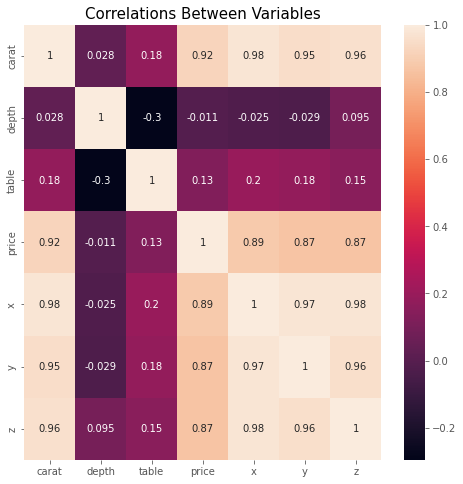

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

In [9]:
df['log_price']=np.log(df['price'])
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131
...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.921898
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,7.921898
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,7.921536
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,7.921536


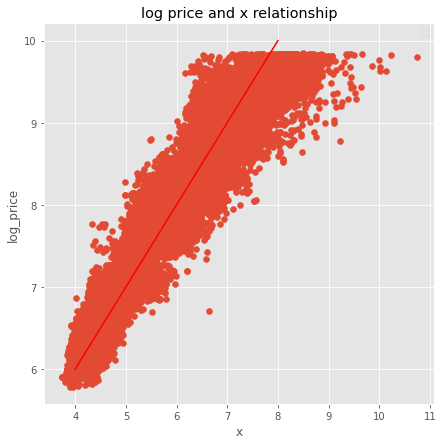

In [10]:
plt.figure(figsize=(7,7))
x=np.linspace(4,8,10)
plt.scatter(df['x'],df['log_price'])
plt.xlabel("x")
plt.ylabel('log_price')
plt.legend()
plt.title("log price and x relationship")
plt.plot(x,x+2,color='r')
plt.show()

In [11]:
X=pd.get_dummies(df.drop(columns=['price','log_price']))
y=df.log_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
53939,0.75,62.2,55.0,5.83,5.87,3.64,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
53940,0.71,60.5,55.0,5.79,5.74,3.49,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53941,0.71,59.8,62.0,5.74,5.73,3.43,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [12]:
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)

0.9809708733825763

In [13]:
reg.score(X_train, y_train)

0.9815638090889566

In [14]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.13959764276831865

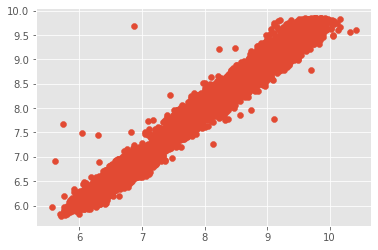

In [15]:
plt.scatter(y_pred,y_test)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53923 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53923 non-null  float64
 1   cut        53923 non-null  object 
 2   color      53923 non-null  object 
 3   clarity    53923 non-null  object 
 4   depth      53923 non-null  float64
 5   table      53923 non-null  float64
 6   price      53923 non-null  int64  
 7   x          53923 non-null  float64
 8   y          53923 non-null  float64
 9   z          53923 non-null  float64
 10  log_price  53923 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.9+ MB


In [17]:
y=df['price'].values
X=df['carat'].values

In [18]:
print(X.shape,y.shape)

(53923,) (53923,)


In [19]:
y=y.reshape(-1,1)
X=X.reshape(-1,1)

In [20]:
print(X.shape,y.shape)

(53923, 1) (53923, 1)


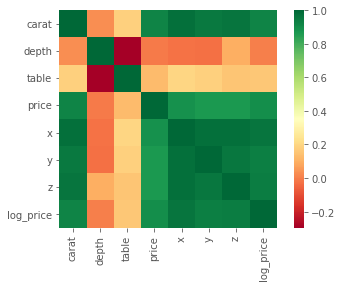

In [21]:
sns.heatmap(df.corr(),square=True,cmap='RdYlGn')
plt.show()

0.8493318856166829


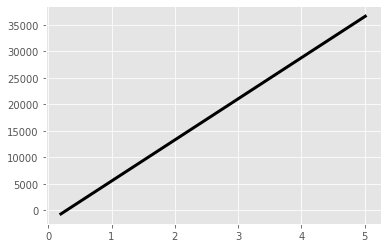

In [22]:
reg = LinearRegression()
prediction_space=np.linspace(min(X), max(X)).reshape(-1,1)
reg.fit(X,y)
y_pred=reg.predict(prediction_space)
print(reg.score(X,y))
plt.plot(prediction_space,y_pred,color='black',linewidth=3)

In [23]:
#rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#rmse

In [24]:
X

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.71],
       [0.71],
       [0.7 ]])

In [25]:
y

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2756],
       [2756],
       [2757]])

In [26]:
reg = LinearRegression()
cv_scores=cross_val_score(reg, X,y,cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-0.76477952  0.40970499  0.72209925 -6.76623534 -1.38925468]
Average 5-Fold CV Score: -1.5576930590801776


In [27]:
X=pd.get_dummies(df.drop(columns=['price','log_price']))
y=df.log_price


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r_squared)
    print("-"*30)
    rmse_cross_val = rmse_cv(lin_reg)
    print("RMSE Cross-Validation:", rmse_cross_val)
    return mae, mse, rmse, r_squared

In [30]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

Linear

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
#print("MAE:", mae)
#print("MSE:", mse)
#print("RMSE:", rmse)
#print("R2 Score:", r_squared)
#print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
#print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.10616187101816696
MSE: 0.019487501866471107
RMSE: 0.13959764276831865
R2 Score: 0.9809708733825763
------------------------------
RMSE Cross-Validation: 0.16287456212131546


Ridge

In [32]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.10615670231557817
MSE: 0.019484746059023377
RMSE: 0.13958777188215082
R2 Score: 0.9809735643693028
------------------------------
RMSE Cross-Validation: 0.16287456212131546
MAE: 0.10615670231557817
MSE: 0.019484746059023377
RMSE: 0.13958777188215082
R2 Score: 0.9809735643693028
------------------------------
RMSE Cross-Validation: 0.16276764675146924


Lasso

In [33]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.8034215655251885
MSE: 0.8693025526710948
RMSE: 0.932363959337283
R2 Score: 0.15114474615706996
------------------------------
RMSE Cross-Validation: 0.16287456212131546
MAE: 0.8034215655251885
MSE: 0.8693025526710948
RMSE: 0.932363959337283
R2 Score: 0.15114474615706996
------------------------------
RMSE Cross-Validation: 0.984115215866886


Elastic

In [34]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.5154023053619525
MSE: 0.36928905508115273
RMSE: 0.607691578912488
R2 Score: 0.6393971769332515
------------------------------
RMSE Cross-Validation: 0.16287456212131546
MAE: 0.5154023053619525
MSE: 0.36928905508115273
RMSE: 0.607691578912488
R2 Score: 0.6393971769332515
------------------------------
RMSE Cross-Validation: 0.6844959324590955


support

In [35]:
"""svr = SVR(C=100)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)"""

'svr = SVR(C=100)\nsvr.fit(X_train, y_train)\npredictions = svr.predict(X_test)\n\nmae, mse, rmse, r_squared = evaluation(y_test, predictions)\nprint("MAE:", mae)\nprint("MSE:", mse)\nprint("RMSE:", rmse)\nprint("R2 Score:", r_squared)\nprint("-"*30)\nrmse_cross_val = rmse_cv(svr)\nprint("RMSE Cross-Validation:", rmse_cross_val)\n\nnew_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}\nmodels = models.append(new_row, ignore_index=True)'

In [36]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
1,Ridge,0.106157,0.019485,0.139588,0.980974,0.162768
0,LinearRegression,0.106162,0.019488,0.139598,0.980971,0.162875
3,ElasticNet,0.515402,0.369289,0.607692,0.639397,0.684496
2,Lasso,0.803422,0.869303,0.932364,0.151145,0.984115


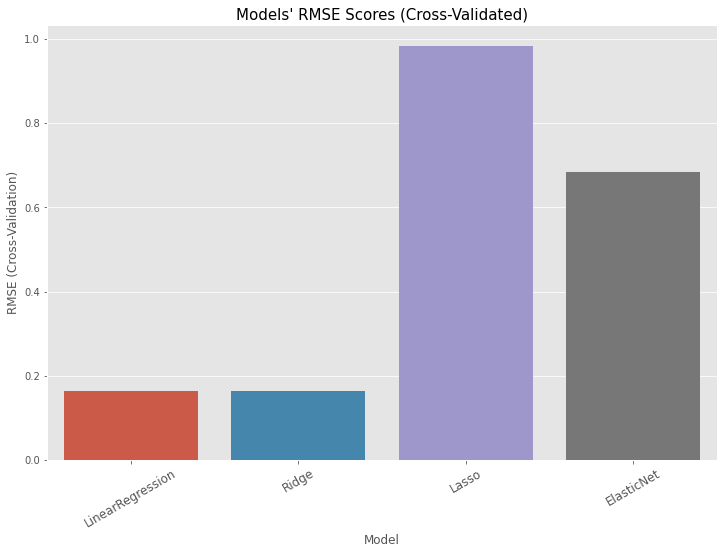

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()